# Setup

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# DataLoad

In [3]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                        download= True,
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [36]:
dataiter = iter(trainloader)
images, labels = next(dataiter) # One instance of 4 images

print(images.shape)

# torch.Size([4, 3, 32, 32]) 
#           (Batch size, Chanells,pixel x pixle)


print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
2


# Visulaize data

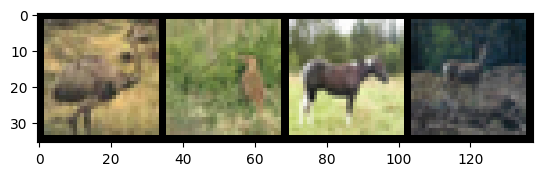

horse  dog  bird  bird


In [150]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
print('  '.join(classes[labels[j]] for j in range(4)))

# CNN Network

In [78]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self). __init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1, 1), stride=(2, 2)) # nn.Conv2d(input channels, output channels, kernal size)

    def forward(self, x):
        x = self.conv1(x)
        return x

In [79]:
net = FirstCNN()
out = net(images)
print('output:', out.shape,'batch size, output channels, image size' ) # batch size, output channels, image size

for param in net.parameters():
    print('params:',param.shape, 'number of kernals, input channels, image size') # number of kernals, input channels, image size

output: torch.Size([4, 16, 16, 16]) batch size, output channels, image size
params: torch.Size([16, 3, 3, 3]) number of kernals, input channels, image size
params: torch.Size([16]) number of kernals, input channels, image size


(16, 16)


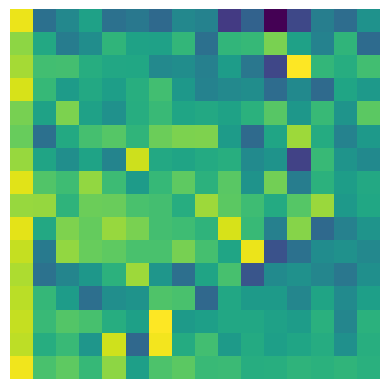

In [81]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)
plt.imshow(out1)
plt.axis('off')
plt.show()

# Deep Convolution Network

torch.Size([4, 16, 28, 28])


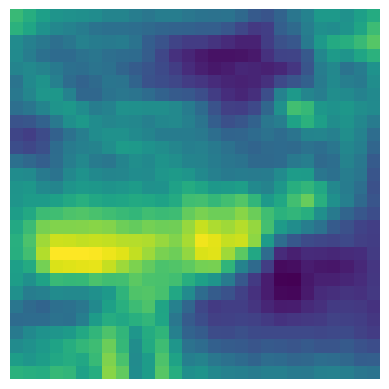

In [93]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3), # (N, 3, 32, 32) = (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3) # (N, 8, 30, 30) = (N, 16, 28, 28)
        )
    
    def forward(self, x):
        x = self.model(x)
        return x

net = FirstCNN_v2()
out = net(images)
print(out.shape)

plt.imshow(out[0, 0, :, :].detach().numpy())
plt.axis('off')
plt.show()

torch.Size([4, 16, 5, 5])


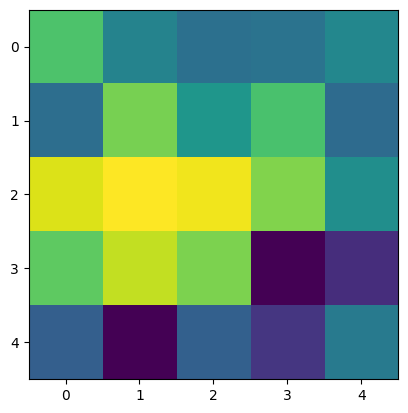

In [107]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         #(N, 3, 32, 32) = (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),  #(N, 6, 28, 28) = (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),        #(N, 6, 14, 14) = (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)   #(N, 16, 10, 10)= (N, 16, 5, 5)
        )
    
    def forward(self, x):
        x = self.model(x)
        return x


net = FirstCNN_v3()
out = net(images)
print(out.shape)

plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

# LeNet

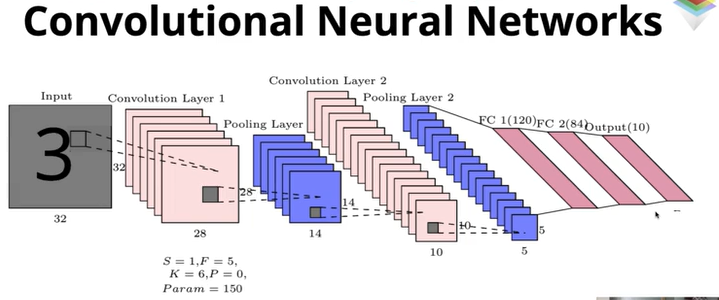

In [112]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),            #(N, 3, 32, 32) = (N, 6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),     #(N, 6, 28, 28) = (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),           #(N, 6, 14, 14) = (N, 16, 10, 10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)      #(N, 16, 10, 10) = (N, 16, 5, 5)
        )
        
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),           #(N, 400) = (N, 120)
            nn.Tanh(),                 
            nn.Linear(120,84),             #(N, 120) = (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)               #(N, 84) = (N, 10)
        )
    
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x


net = LeNet()
out = net(images)
print(out.shape)
max_values, pred_class = torch.max(out.data, 1)
print(max_values)
pred_class

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])
torch.Size([4, 10])
tensor([0.1930, 0.1978, 0.1854, 0.1874])


tensor([2, 2, 2, 2])

# Training LeNet

In [114]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
import torch.optim as optim

cuda:0


In [115]:
batch_size = 128
transform = transforms.ToTensor()
trainset = torchvision.datasets.CIFAR10(root='./data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [117]:
!pip install tqdm
from tqdm import tqdm

  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)


  6%|▋         | 1/16 [00:11<02:45, 11.05s/it]

Epoch: 1/16 | Test Acc: 38.15% | Train Acc: 37.87%


 12%|█▎        | 2/16 [00:22<02:34, 11.05s/it]

Epoch: 2/16 | Test Acc: 41.97% | Train Acc: 42.12%


 19%|█▉        | 3/16 [00:33<02:24, 11.08s/it]

Epoch: 3/16 | Test Acc: 46.03% | Train Acc: 46.81%


 25%|██▌       | 4/16 [00:44<02:13, 11.09s/it]

Epoch: 4/16 | Test Acc: 48.65% | Train Acc: 49.79%


 31%|███▏      | 5/16 [00:55<02:01, 11.06s/it]

Epoch: 5/16 | Test Acc: 49.68% | Train Acc: 51.59%


 38%|███▊      | 6/16 [01:06<01:50, 11.04s/it]

Epoch: 6/16 | Test Acc: 50.94% | Train Acc: 53.94%


 44%|████▍     | 7/16 [01:17<01:39, 11.02s/it]

Epoch: 7/16 | Test Acc: 52.27% | Train Acc: 55.24%


 50%|█████     | 8/16 [01:28<01:28, 11.01s/it]

Epoch: 8/16 | Test Acc: 53.02% | Train Acc: 57.17%


 56%|█████▋    | 9/16 [01:39<01:17, 11.01s/it]

Epoch: 9/16 | Test Acc: 54.19% | Train Acc: 58.75%


 62%|██████▎   | 10/16 [01:50<01:06, 11.01s/it]

Epoch: 10/16 | Test Acc: 54.52% | Train Acc: 59.60%


 69%|██████▉   | 11/16 [02:01<00:54, 11.00s/it]

Epoch: 11/16 | Test Acc: 54.37% | Train Acc: 59.80%


 75%|███████▌  | 12/16 [02:12<00:43, 10.99s/it]

Epoch: 12/16 | Test Acc: 55.16% | Train Acc: 61.89%


 81%|████████▏ | 13/16 [02:23<00:33, 11.01s/it]

Epoch: 13/16 | Test Acc: 55.17% | Train Acc: 62.28%


 88%|████████▊ | 14/16 [02:34<00:22, 11.01s/it]

Epoch: 14/16 | Test Acc: 55.87% | Train Acc: 63.60%


 94%|█████████▍| 15/16 [02:45<00:11, 11.00s/it]

Epoch: 15/16 | Test Acc: 55.87% | Train Acc: 64.30%


100%|██████████| 16/16 [02:56<00:00, 11.02s/it]

Epoch: 16/16 | Test Acc: 55.83% | Train Acc: 65.18%


Test acc: 55.83, Train acc: 65.18


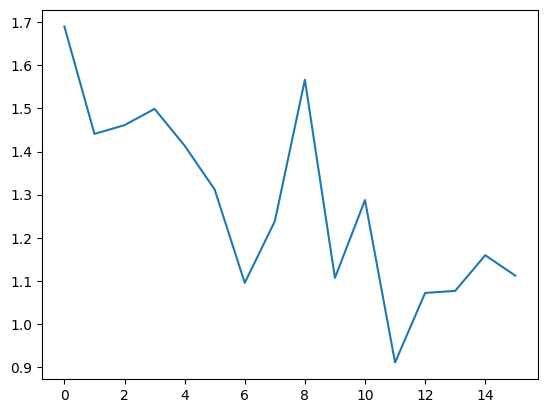

In [124]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(6, 16, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),
        )

        self.fc_model = nn.Sequential(
            nn. Linear(400, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)

        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x
    
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

loss_arr = []
loss_epoch_arr = []
max_epochs = 16
for epoch in tqdm(range(max_epochs)):

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    print(f'Epoch: {epoch+1}/{max_epochs} | Test Acc: {evaluation(testloader):.2f}% | Train Acc: {evaluation(trainloader):.2f}%')    

def evaluation(dataloader):
    total, correct =0 , 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct/total

print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

Epoch: 1/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 2/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 3/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 4/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 5/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 6/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 7/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 8/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 9/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 10/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 11/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 12/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 13/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 14/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 15/16 | Test Acc: 55.83% | Train Acc: 65.18%
Epoch: 16/16 | Test Acc: 55.83% | Train Acc: 65.18%
Test acc: 10.49, Train acc: 10.55


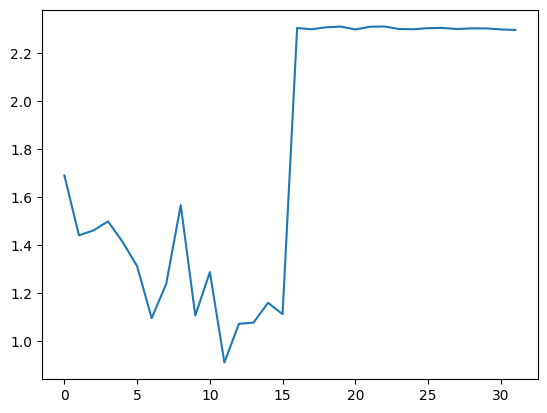

In [125]:
class LeNet_ReLU(nn.Module):
    def __init__(self):
        super(LeNet_ReLU, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(0.1),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(0.1),
            nn.AvgPool2d(2, stride=2)
        )
        
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),
            nn.ReLU(0.1),
            nn.Linear(120,84),
            nn.ReLU(0.1),
            nn.Linear(84,10)
        )
    
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x
    

net_ReLu = LeNet_ReLU().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

max_epochs = 16
for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net_ReLu(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    print(f'Epoch: {epoch+1}/{max_epochs} | Test Acc: {evaluation(testloader):.2f}% | Train Acc: {evaluation(trainloader):.2f}%')    

          
def evaluation(dataloader):
    total, correct =0 , 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net_ReLu(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct/total

print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))
plt.plot(loss_epoch_arr)
plt.show()

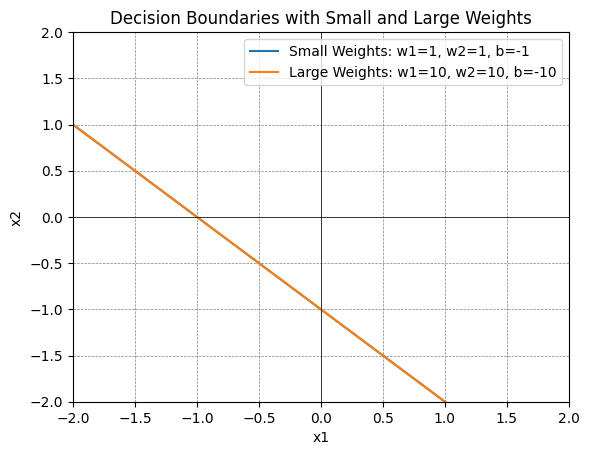

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Define the decision boundary function
def plot_decision_boundary(w1, w2, b, ax, label):
    x = np.linspace(-2, 2, 400)
    y = (b - w1 * x) / w2
    ax.plot(x, y, label=label)

# Create a plot
fig, ax = plt.subplots()

# Plot decision boundaries for small and large weights
plot_decision_boundary(1, 1, -1, ax, 'Small Weights: w1=1, w2=1, b=-1')
plot_decision_boundary(10, 10, -10, ax, 'Large Weights: w1=10, w2=10, b=-10')

# Add labels and legend
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundaries with Small and Large Weights')

# Show plot
plt.show()


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(6, 16, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),
        )

        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)
        )

    def forward(self,  x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = LeNet().to(device)


loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), weight_decay=0.01) 


max_epochs = 16
for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))


def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))


Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
Test acc: 47.92, Train acc: 48.68


# Basic Visualisation

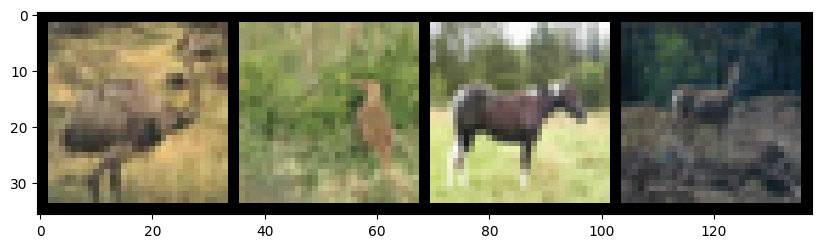

In [126]:
imshow(torchvision.utils.make_grid(images))

In [138]:
net = net.to('cpu')
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [146]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

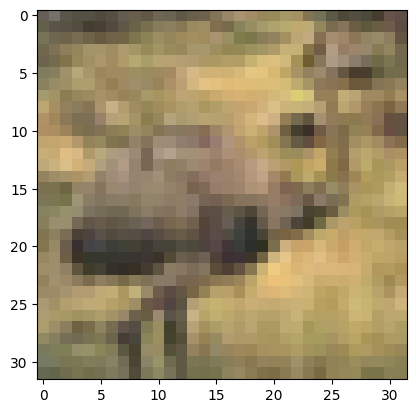

In [154]:
imshow(images[0])

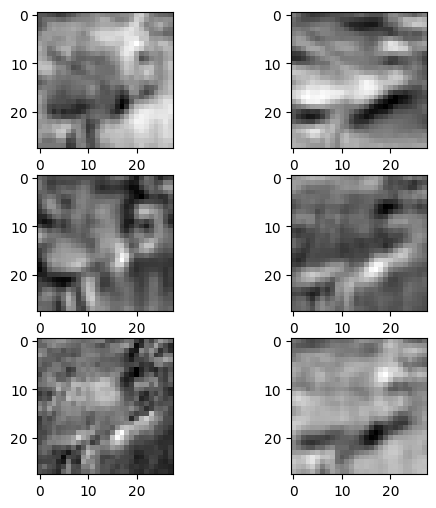

In [156]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[0, i, :, :].detach().numpy(), cmap="binary")
plt.show()